# Topic modelling 

In this notebook we test out the LSA and LDA algorithms on a large corpus of text (BBC news articles) to obtain key topics from text.

Data source: http://mlg.ucd.ie/datasets/bbc.html


Contents:

1. Import libraries
- Load data
- Pre-process text
- Latent Semantic Analysis (LSA)
- Latent Dirichlet Allocation (LDA)
- Classify a new document to a topic

## 1. Import libraries

In [1]:
import os
import json
import pandas as pd
import collections
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
import time
from nlp_utils import *

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Paresh.Sharma@ibm.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Paresh.Sharma@ibm.com/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Paresh.Sharma@ibm.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Paresh.Sharma@ibm.com/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Load data

In [2]:
# change cwd
path = '/Users/Paresh.Sharma@ibm.com/Paresh/Data Science/Github Projects-master/14. Topic modelling (BBC articles)'
os.chdir(path)

In [3]:
df = pd.read_csv('articles.csv', index_col=0)

In [4]:
print(df.shape)
df.head()

(2962, 4)


,Text,Source,Category,Sub-category
0,Ad sales boost Time Warner profit Quarterly pr...,bbc,business,NaN
1,Dollar gains on Greenspan speech The dollar ha...,bbc,business,NaN
2,Yukos unit buyer faces loan claim The owners o...,bbc,business,NaN
3,High fuel prices hit BAs profits British Airwa...,bbc,business,NaN
4,Pernod takeover talk lifts Domecq Shares in UK...,bbc,business,NaN


## 3. Pre-process text

In [5]:
# pre-process text
processed_docs = df['Text'].apply(preprocess, remove_accents=True, remove_less_than=2, remove_more_than=10,
                                  remove_punct=True, remove_alpha=True, remove_stopwords=True, 
                                  add_custom_stopwords = [], lemma=True, stem=True)

# remove comments with less than 10 words and more than 5000 words
processed_docs = [text for text in processed_docs if len(text)>10 & len(text)<5000]

# obtain dictionary, DTM and weighted DTM
# remove words in less than 2 documents (absolute no.)
# remove words in more than 0.5 documents (fraction of total corpus size, not absolute no.)
# keep only the first 100000 most frequent tokens

dictionary, doc_term_matrix, weighted_doc_term_matrix = prepare_corpus(processed_docs, 
                                                                       no_below=2, no_above=0.5, keep_n=100000)

## 4. Latent Semantic Analysis (LSA)

Max coherence value: 0.5662566496494776
Found at topic: 8


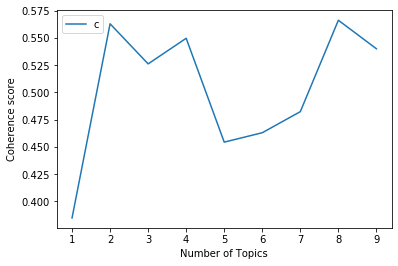

In [30]:
# identify the optimal number of topics (highest value)
plot_coherence_graph(processed_docs, dictionary, weighted_doc_term_matrix, start=1, stop=10, step=1)

In [6]:
# train lsa model with the optimal number of topics 
lsa_model = gensim.models.LsiModel(weighted_doc_term_matrix, num_topics=5, id2word=dictionary, chunksize=100)

for idx, topic in lsa_model.print_topics(-1, 7):
    print('Topic: {} \nWords: {}'.format(idx+1, topic))
    print('')

Topic: 1 
Words: 0.121*"mr" + 0.099*"game" + 0.099*"england" + 0.085*"elect" + 0.085*"film" + 0.083*"labour" + 0.081*"play"

Topic: 2 
Words: 0.188*"mr" + 0.166*"labour" + 0.166*"elect" + -0.143*"england" + 0.138*"tax" + 0.131*"blair" + 0.129*"bn"

Topic: 3 
Words: -0.496*"film" + -0.272*"award" + -0.207*"oscar" + -0.174*"best" + -0.159*"actor" + -0.139*"star" + -0.122*"actress"

Topic: 4 
Words: -0.240*"labour" + -0.216*"elect" + -0.203*"blair" + 0.182*"growth" + -0.182*"parti" + 0.165*"rate" + 0.164*"economi"

Topic: 5 
Words: 0.385*"yuko" + -0.196*"economi" + -0.183*"rate" + -0.180*"growth" + 0.146*"gazprom" + 0.144*"russian" + 0.139*"yugansk"



## 5. Latent Dirichlet Allocation (LDA)

Min log perplexity value: 11971.823810045453
Found at topic: 5


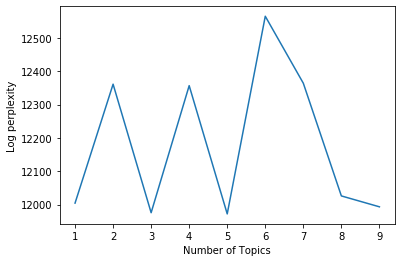

In [32]:
# identify the optimal number of topics (lowest value)
plot_log_perplexity_graph(processed_docs, dictionary, weighted_doc_term_matrix, start=1, stop=10, step=1)

In [7]:
# train lda model 
lda_model = gensim.models.LdaMulticore(weighted_doc_term_matrix, num_topics=5, id2word=dictionary, workers=7, chunksize=100, 
                                       passes=2, random_state=123)

for idx, topic in lda_model.print_topics(-1, 8):
    print('Topic: {} \nWords: {}'.format(idx+1, topic))
    print('')

Topic: 1 
Words: 0.003*"england" + 0.002*"play" + 0.002*"game" + 0.002*"match" + 0.002*"win" + 0.002*"player" + 0.002*"seed" + 0.002*"open"

Topic: 2 
Words: 0.001*"bt" + 0.001*"airlin" + 0.001*"roch" + 0.001*"china" + 0.001*"dollar" + 0.001*"trade" + 0.001*"bangladesh" + 0.001*"bn"

Topic: 3 
Words: 0.002*"wasp" + 0.002*"oconnor" + 0.001*"film" + 0.001*"music" + 0.001*"appl" + 0.001*"googl" + 0.001*"cup" + 0.001*"search"

Topic: 4 
Words: 0.002*"mr" + 0.002*"labour" + 0.002*"film" + 0.002*"elect" + 0.002*"mobil" + 0.002*"parti" + 0.001*"peopl" + 0.001*"tax"

Topic: 5 
Words: 0.001*"bn" + 0.001*"mobil" + 0.001*"sale" + 0.001*"pension" + 0.001*"economi" + 0.001*"compani" + 0.001*"growth" + 0.001*"mr"



In [34]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=weighted_doc_term_matrix, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Applications/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## 6. Classify a new document to a topic

In [9]:
def classify_new_doc(new_doc, model, show_n_words=5): 
    
    '''
    Classifies a new document to a topic. 
    
    Parameters: 
    new_doc (string): a new document
    model: LSA or LDA model
    show_n_words (int): show N number of important features (words) for each topic
    
    
    Returns:
    
    Topic scores and key features for each topic. 
    '''

    bow_vector = dictionary.doc2bow(preprocess(new_doc))

    for index, score in sorted(model[bow_vector]):
        print("Topic: {} \tScore: {}".format(index+1, score))
        print("Words: {}".format(model.print_topic(index, show_n_words)))
        print('')

In [20]:
txt = "Amazon is offering its till-less technology"

classify_new_doc(txt, lda_model, show_n_words=5)

Topic: 1 	Score: 0.0346783883869648
Words: 0.003*"england" + 0.002*"play" + 0.002*"game" + 0.002*"match" + 0.002*"win"

Topic: 2 	Score: 0.03352591022849083
Words: 0.001*"bt" + 0.001*"airlin" + 0.001*"roch" + 0.001*"china" + 0.001*"dollar"

Topic: 3 	Score: 0.033744264394044876
Words: 0.002*"wasp" + 0.002*"oconnor" + 0.001*"film" + 0.001*"music" + 0.001*"appl"

Topic: 4 	Score: 0.8636755347251892
Words: 0.002*"mr" + 0.002*"labour" + 0.002*"film" + 0.002*"elect" + 0.002*"mobil"

Topic: 5 	Score: 0.034375887364149094
Words: 0.001*"bn" + 0.001*"mobil" + 0.001*"sale" + 0.001*"pension" + 0.001*"economi"

